In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV  #Perforing grid search
from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [3]:
df=pd.read_csv("E:/kaggle_1/creditcard.csv/creditcard.csv")
x=df
y=df['Class']

In [4]:
target='Class'
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7)

C:\Users\SPundir\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Class'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['Class'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Class'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Class'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Accuracy : 0.999
AUC Score (Train): 0.557887
CV Score : Mean - 0.8330045 | Std - 0.0496444 | Min - 0.7645042 | Max - 0.9114791


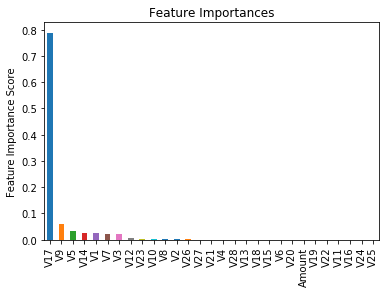

In [6]:
predictors = [x for x in x_train.columns if x not in [target]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, x_train, predictors)

Tuning for number of learners

In [7]:
predictors = [x for x in x_train.columns if x not in [target]]
prm_test = {'n_estimators':range(20,81,10)}
gsearch_learner = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.04, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = prm_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_learner.fit(x_train[predictors],x_train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.04, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_s...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [8]:
gsearch_learner.best_params_, gsearch_learner.best_score_

({'n_estimators': 80}, 0.8779585168213038)

In [9]:
param_test_treebases = {'max_depth':range(4,20,2), 'min_samples_split':range(200,1001,200)}
gsearch_treebases = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.04, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test_treebases, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_treebases.fit(x_train[predictors],x_train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.04, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(4, 20, 2), 'min_samples_split': range(200, 1001, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [10]:
gsearch_treebases.best_params_, gsearch_treebases.best_score_

({'max_depth': 16, 'min_samples_split': 800}, 0.8726395441385183)

In [ ]:
param_test_fea = {'max_features':range(10,30,2), 'min_samples_leaf':range(30,71,10)}
gsearch_fea = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.04, n_estimators=60,max_depth=8,max_features='sqrt', subsample=0.8,min_samples_split=400, random_state=10), 
param_grid = param_test_fea, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch_fea.fit(x_train[predictors],x_train[target])
